In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.datasets import load_digits
dataset = load_digits()
X, y = dataset.data, dataset.target

y_imbalanced = y.copy()
y_imbalanced[y_imbalanced != 1] = 0

print(y)            # digits 0-9 with equal dist
print(y_imbalanced) # 1 has 10% probability and 0 has 90% probability

X_train, X_test, y_train, y_test = train_test_split(X, y_imbalanced, random_state=0)

[0 1 2 ... 8 9 8]
[0 1 0 ... 0 0 0]


#### Dummy Classifier

In [6]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train, y_train)

dummy_clf.score(X_test, y_test) 

# We see that provides null accuracy is 90%. 
# This shows how high accuracy does not necessarily mean good classifier and underlines the importance of also using other evaluation methods
# In short, this offers a sanity check

0.9044444444444445

#### Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, dummy_clf.predict(X_test))

# [True Negative, False Positive]
# [False Negative, True Positive]

# We see that the nature of the classifier is having no false positives and a lot of false negatives
# This means this classifier is only predicting negative

array([[407,   0],
       [ 43,   0]])

In [8]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear', C=1)
clf.fit(X_train, y_train)

SVC_predict = clf.predict(X_test)
confusion_matrix(y_test, SVC_predict)

array([[402,   5],
       [  5,  38]])

### Q: Minimizing false negatives or false positives?
### $Precision = TP/(TP+FP)$ and $Recall = TP/(TP+FN)$

##### High Precision, Low Recall
false positive (wrongful conviction) is damaging when convicting criminals, and false negative (innocence of criminal) is favored

##### Low Precision, High Recall
false positive (labeling nonevidence as evidence) is OK when searching for evidence in a court case because experts can filter them out, but false negative (leaving out evidence) is damaging

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, SVC_predict))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy:\t", accuracy_score(y_test, SVC_predict))
print("precision:\t", precision_score(y_test, SVC_predict))
print("recall:\t\t", recall_score(y_test, SVC_predict))
print("f1:\t\t", f1_score(y_test, SVC_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

accuracy:	 0.9777777777777777
precision:	 0.8837209302325582
recall:		 0.8837209302325582
f1:		 0.8837209302325582


### Precision Recall Curve

Text(0, 0.5, 'Recall')

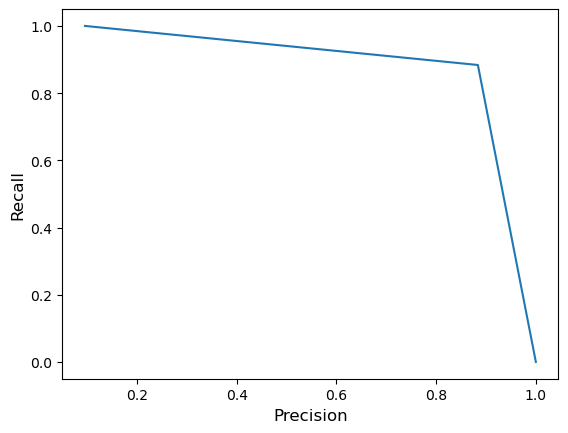

In [10]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, SVC_predict)

plt.plot(precision, recall, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=12)
plt.ylabel('Recall', fontsize=12)

### Multi-Class Evaluation

Text(0.5, 14.722222222222216, 'Predicted label')

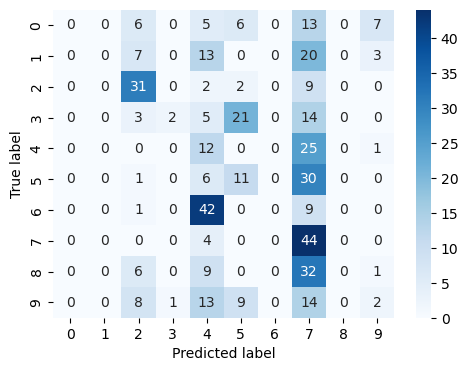

In [11]:
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


clf = SVC(kernel = 'sigmoid')
clf.fit(X_train, y_train)

clf_predict = clf.predict(X_test * 1.9)

matrix = confusion_matrix(y_test, clf_predict)
df = pd.DataFrame(matrix)

plt.figure(figsize=(5.5,4))
sns.heatmap(df, annot=True, cmap = 'Blues')

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Example of classifier that predicts 7 too much

### Regression Evaluation
Typically, r2_score is enough, but median_absolute_error can also be used if ignoring outliers is important

### Model Selection

In [13]:
from sklearn.model_selection import cross_val_score
 
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# five folds of accuracy scoring
print(cross_val_score(clf, X, y, cv=5))

# five folds of area under the curve evaluation
print(cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))

# five folds of recall evaluation
print(cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

[0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
[0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
[0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')

# test gamma values
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# Training SVC with different gamma values to find best accuracy
grid = GridSearchCV(clf, param_grid = grid_values)
grid.fit(X_train, y_train)

print('Grid best parameter (max. accuracy): ', grid.best_params_)
print('Grid best score (accuracy): ', grid.best_score_)

# Training SVC with different gamma values to find highest area under curve
grid = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid.fit(X_train, y_train)

print('Grid best parameter (max. AUC): ', grid.best_params_)
print('Grid best score (AUC): ', grid.best_score_)

Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9985157648354676
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  1.0


In [21]:
from sklearn.metrics import SCORERS
list(SCORERS.keys()) 

['explained_variance',
 'r2',
 'max_error',
 'matthews_corrcoef',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jacca